## Calculating the Return of a Portfolio of Securities


_Suggested Answers follow (usually there are multiple ways to solve a problem in Python)._


Download data for a portfolio composed of 5 stocks. Do it for British Petroleum, Ford, Exxon, Lincoln, and Apple for the period ‘2000-1-1’ until today.


In [86]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import yfinance as yf

In [87]:
tickers = [
    "WEGE3.SA",
    "VALE3.SA",
    "PETR4.SA",
    "ARZZ3.SA",
    "LREN3.SA",
    "GRND3.SA",
    "ABEV3.SA",
    "MDIA3.SA",
    "SLCE3.SA",
    "PSSA3.SA",
    "ITUB3.SA",
    "BBDC4.SA",
    "BBAS3.SA",
    "RADL3.SA",
    "ODPV3.SA",
    "FLRY3.SA",
    "HYPE3.SA",
    "VIVT3.SA",
    "EGIE3.SA",
    "EQTL3.SA",
]
mydata = pd.DataFrame()
for t in tickers:
    msft_ticker = yf.Ticker(t)
    history = msft_ticker.history(start="2011-02-02")
    mydata[t] = history["Close"]

In [88]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3159 entries, 2011-02-02 00:00:00-02:00 to 2023-10-20 00:00:00-03:00
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   WEGE3.SA  3159 non-null   float64
 1   VALE3.SA  3159 non-null   float64
 2   PETR4.SA  3159 non-null   float64
 3   ARZZ3.SA  3159 non-null   float64
 4   LREN3.SA  3159 non-null   float64
 5   GRND3.SA  3159 non-null   float64
 6   ABEV3.SA  3159 non-null   float64
 7   MDIA3.SA  3159 non-null   float64
 8   SLCE3.SA  3159 non-null   float64
 9   PSSA3.SA  3159 non-null   float64
 10  ITUB3.SA  3159 non-null   float64
 11  BBDC4.SA  3159 non-null   float64
 12  BBAS3.SA  3159 non-null   float64
 13  RADL3.SA  3159 non-null   float64
 14  ODPV3.SA  3159 non-null   float64
 15  FLRY3.SA  3159 non-null   float64
 16  HYPE3.SA  3159 non-null   float64
 17  VIVT3.SA  3159 non-null   float64
 18  EGIE3.SA  3159 non-null   float64
 19  EQTL3.SA  3159 non-nu

In [89]:
mydata.head()

,WEGE3.SA,VALE3.SA,PETR4.SA,ARZZ3.SA,LREN3.SA,GRND3.SA,ABEV3.SA,MDIA3.SA,SLCE3.SA,PSSA3.SA,ITUB3.SA,BBDC4.SA,BBAS3.SA,RADL3.SA,ODPV3.SA,FLRY3.SA,HYPE3.SA,VIVT3.SA,EGIE3.SA,EQTL3.SA
Date,,,,,,,,,,,,,,,,,,,,
2011-02-02 00:00:00-02:00,2.253755,28.133116,8.528584,16.156570,6.062708,1.406950,4.795161,9.690911,4.228763,5.903143,7.290087,6.251499,12.737894,2.010031,4.894272,7.360962,14.331347,14.247667,9.091360,1.809333
2011-02-03 00:00:00-02:00,2.203392,28.084101,8.599151,16.004507,6.062708,1.371584,4.725113,9.585832,4.188589,5.671150,7.249604,6.161167,12.681915,2.023521,4.724413,7.154855,13.921668,14.269588,8.986865,1.770000
2011-02-04 00:00:00-02:00,2.181645,27.613585,8.473367,15.966491,5.852370,1.345443,4.677989,9.588456,4.144187,5.556304,7.064888,5.994870,12.100573,1.956070,4.620232,7.287356,13.694064,14.306116,8.952026,1.803040
2011-02-07 00:00:00-02:00,2.117547,27.819433,8.350653,15.966491,6.099830,1.351594,4.725113,9.627863,4.123044,5.501177,7.110429,6.056460,12.178084,1.981365,4.583992,7.360962,13.982358,14.247667,8.969448,1.809333
2011-02-08 00:00:00-02:00,2.114112,27.657698,8.246346,15.267008,6.383166,1.360820,4.782426,9.614727,3.860861,5.682637,7.300210,6.203048,12.402003,1.951012,4.685910,7.007638,14.392042,14.086924,8.965964,1.848666


In [90]:
mydata.tail()

,WEGE3.SA,VALE3.SA,PETR4.SA,ARZZ3.SA,LREN3.SA,GRND3.SA,ABEV3.SA,MDIA3.SA,SLCE3.SA,PSSA3.SA,ITUB3.SA,BBDC4.SA,BBAS3.SA,RADL3.SA,ODPV3.SA,FLRY3.SA,HYPE3.SA,VIVT3.SA,EGIE3.SA,EQTL3.SA
Date,,,,,,,,,,,,,,,,,,,,
2023-10-16 00:00:00-03:00,34.650002,67.300003,36.680000,63.560001,12.96,6.43,13.01,36.150002,37.740002,25.950001,23.549999,14.64,49.810001,27.840000,10.70,15.59,34.599998,46.540001,41.150002,30.879999
2023-10-17 00:00:00-03:00,34.279999,67.849998,37.669998,62.779999,12.81,6.34,12.80,34.900002,37.060001,25.770000,23.299999,14.49,49.360001,27.660000,10.58,15.40,33.950001,45.730000,40.720001,30.620001
2023-10-18 00:00:00-03:00,34.290001,65.360001,38.520000,59.509998,12.24,6.14,12.53,34.060001,36.310001,25.450001,22.990000,14.36,49.119999,26.299999,10.48,15.03,33.889999,45.840000,40.139999,30.070000
2023-10-19 00:00:00-03:00,33.939999,64.419998,38.340000,58.680000,12.34,6.23,12.52,33.779999,36.689999,25.480000,23.160000,14.43,49.500000,26.400000,10.38,15.12,33.820000,45.779999,40.610001,30.650000
2023-10-20 00:00:00-03:00,33.810001,62.680000,37.849998,58.910000,12.22,6.24,12.49,33.830002,36.270000,25.400000,23.129999,14.16,49.340000,26.059999,10.71,15.18,33.740002,45.139999,40.619999,31.000000


### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$


Normalize to a hundred and plot the data on a graph (you can apply the .loc() or the .iloc() method).


In [91]:
mydata.iloc[0]

WEGE3.SA     2.253755
VALE3.SA    28.133116
PETR4.SA     8.528584
ARZZ3.SA    16.156570
LREN3.SA     6.062708
GRND3.SA     1.406950
ABEV3.SA     4.795161
MDIA3.SA     9.690911
SLCE3.SA     4.228763
PSSA3.SA     5.903143
ITUB3.SA     7.290087
BBDC4.SA     6.251499
BBAS3.SA    12.737894
RADL3.SA     2.010031
ODPV3.SA     4.894272
FLRY3.SA     7.360962
HYPE3.SA    14.331347
VIVT3.SA    14.247667
EGIE3.SA     9.091360
EQTL3.SA     1.809333
Name: 2011-02-02 00:00:00-02:00, dtype: float64

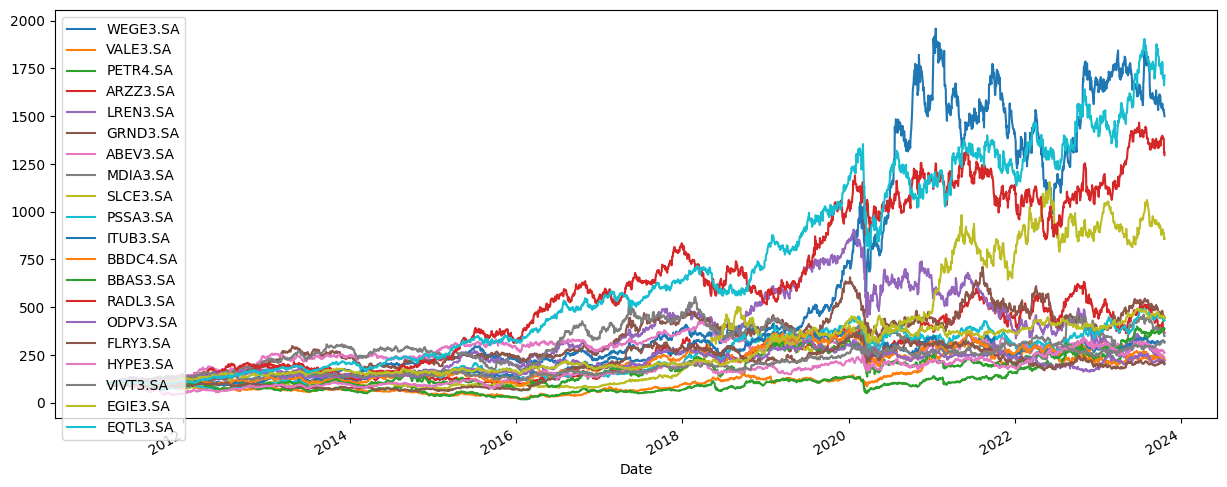

In [92]:
(mydata / mydata.iloc[0] * 100).plot(figsize=(15, 6))
plt.show()

How would you interpret the behavior of the stocks? Just by looking at the chart, would you be able to create a portfolio that provides a solid return on investment?


---


### Calculating the Return of a Portfolio of Securities


Obtain the simple return of the securities in the portfolio and store the results in a new table.


In [93]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,WEGE3.SA,VALE3.SA,PETR4.SA,ARZZ3.SA,LREN3.SA,GRND3.SA,ABEV3.SA,MDIA3.SA,SLCE3.SA,PSSA3.SA,ITUB3.SA,BBDC4.SA,BBAS3.SA,RADL3.SA,ODPV3.SA,FLRY3.SA,HYPE3.SA,VIVT3.SA,EGIE3.SA,EQTL3.SA
Date,,,,,,,,,,,,,,,,,,,,
2011-02-02 00:00:00-02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-03 00:00:00-02:00,-0.022347,-0.001742,0.008274,-0.009412,0.000000,-0.025137,-0.014608,-0.010843,-0.009500,-0.039300,-0.005553,-0.014450,-0.004395,0.006711,-0.034706,-0.028000,-0.028586,0.001539,-0.011494,-0.021739
2011-02-04 00:00:00-02:00,-0.009870,-0.016754,-0.014627,-0.002375,-0.034694,-0.019059,-0.009973,0.000274,-0.010601,-0.020251,-0.025479,-0.026991,-0.045840,-0.033334,-0.022052,0.018519,-0.016349,0.002560,-0.003877,0.018667
2011-02-07 00:00:00-02:00,-0.029381,0.007455,-0.014482,0.000000,0.042284,0.004571,0.010074,0.004110,-0.005102,-0.009921,0.006446,0.010274,0.006406,0.012932,-0.007844,0.010101,0.021052,-0.004086,0.001946,0.003490
2011-02-08 00:00:00-02:00,-0.001622,-0.005814,-0.012491,-0.043809,0.046450,0.006826,0.012130,-0.001364,-0.063590,0.032986,0.026691,0.024204,0.018387,-0.015319,0.022233,-0.048000,0.029300,-0.011282,-0.000388,0.021739


First, assume you would like to create an equally-weighted portfolio. Create the array, naming it “weights”.


In [94]:
weights = np.array(
    [
        0.0720,
        0.0622,
        0.0523,
        0.0262,
        0.0262,
        0.0262,
        0.0523,
        0.0423,
        0.0423,
        0.0436,
        0.0664,
        0.0664,
        0.0664,
        0.0436,
        0.0436,
        0.0436,
        0.0436,
        0.0562,
        0.0623,
        0.0623,
    ]
)

Obtain the annual returns of each of the stocks and then calculate the dot product of these returns and the weights.


In [95]:
annual_returns = returns.mean() * 250
annual_returns

WEGE3.SA    0.264894
VALE3.SA    0.149551
PETR4.SA    0.227241
ARZZ3.SA    0.180676
LREN3.SA    0.128293
GRND3.SA    0.167512
ABEV3.SA    0.110061
MDIA3.SA    0.155347
SLCE3.SA    0.234852
PSSA3.SA    0.161198
ITUB3.SA    0.135540
BBDC4.SA    0.122955
BBAS3.SA    0.190150
RADL3.SA    0.253044
ODPV3.SA    0.111335
FLRY3.SA    0.108158
HYPE3.SA    0.123930
VIVT3.SA    0.131633
EGIE3.SA    0.146831
EQTL3.SA    0.261821
dtype: float64

In [96]:
np.dot(annual_returns, weights)

0.17068563050974583

Transform the result into a percentage form.


In [97]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + " %"
print(pfolio_1)

17.069000000000003 %


Is the return of this portfolio satisfactory?
